In [1]:
#Muhammad Afnan Akram    Email: i190588@nu.edu.pk
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Null values
First we check the attributes with null values and then replace the null values with mean.

In [2]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
#finding the mean of each column
columns_mean = df.mean()
print(columns_mean)
df.describe()

male                 0.429245
age                 49.580189
education            1.979444
currentSmoker        0.494104
cigsPerDay           9.005937
BPMeds               0.029615
prevalentStroke      0.005896
prevalentHyp         0.310613
diabetes             0.025708
totChol            236.699523
sysBP              132.354599
diaBP               82.897759
BMI                 25.800801
heartRate           75.878981
glucose             81.963655
TenYearCHD           0.151887
dtype: float64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
#filling the 'Nan' with mean
df1 = df.fillna(columns_mean)
print(df1)


      male  age  education  currentSmoker  cigsPerDay    BPMeds  \
0        1   39        4.0              0         0.0  0.000000   
1        0   46        2.0              0         0.0  0.000000   
2        1   48        1.0              1        20.0  0.000000   
3        0   61        3.0              1        30.0  0.000000   
4        0   46        3.0              1        23.0  0.000000   
...    ...  ...        ...            ...         ...       ...   
4235     0   48        2.0              1        20.0  0.029615   
4236     0   44        1.0              1        15.0  0.000000   
4237     0   52        2.0              0         0.0  0.000000   
4238     1   40        3.0              0         0.0  0.000000   
4239     0   39        3.0              1        30.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0  

In [5]:
#Again checking for Null values
df1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Feature Selection
Here we perform feature selection. We select the Top 10 features for our model.
We will use SelectKBest.

<AxesSubplot:>

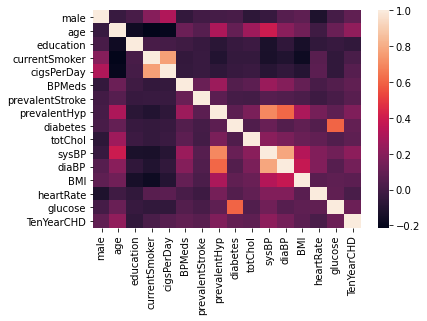

In [6]:
# checking which features are correlated with each other 
#and are correlated with the outcome variable
df_new = df1.corr()
sns.heatmap(df_new)


In [7]:
# Identify the features with the most importance for the outcome variable Heart Disease
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df1.iloc[:,0:15]  #independent columns
y = df1.iloc[:,-1]    #class

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


           Specs       Score
10         sysBP  727.935535
14       glucose  391.151105
1            age  319.266019
9        totChol  235.502392
4     cigsPerDay  220.812679
11         diaBP  152.748563
7   prevalentHyp   92.048736
8       diabetes   39.144944
5         BPMeds   30.615014
0           male   18.899930


In [1]:

featureScores = featureScores.sort_values(by='Score', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'plt' is not defined

In [9]:
#So we will select Top 10 feature.
df_afterfeatureselection = df1[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df_afterfeatureselection

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.000000,39,195.0,0.0,70.0,0,0,0.000000,1,0
1,121.0,76.000000,46,250.0,0.0,81.0,0,0,0.000000,0,0
2,127.5,70.000000,48,245.0,20.0,80.0,0,0,0.000000,1,0
3,150.0,103.000000,61,225.0,30.0,95.0,1,0,0.000000,0,1
4,130.0,85.000000,46,285.0,23.0,84.0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4235,131.0,86.000000,48,248.0,20.0,72.0,0,0,0.029615,0,0
4236,126.5,81.963655,44,210.0,15.0,87.0,0,0,0.000000,0,0
4237,133.5,107.000000,52,269.0,0.0,83.0,0,0,0.000000,0,0
4238,141.0,72.000000,40,185.0,0.0,98.0,1,0,0.000000,1,0


<AxesSubplot:>

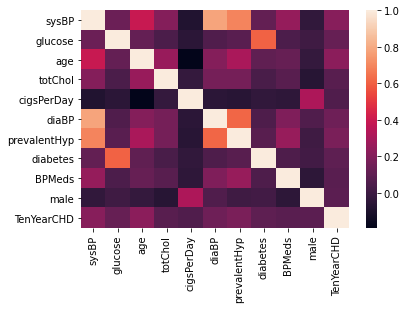

In [10]:
# Checking correlation again
df_correlation_again = df_afterfeatureselection.corr()
sns.heatmap(df_correlation_again)

# # Checking for outliers


In [11]:

df_afterfeatureselection.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,132.354599,81.963655,49.580189,236.699523,9.005937,82.897759,0.310613,0.025708,0.029615,0.429245,0.151887
std,22.033300,22.831748,8.572942,44.327521,11.881610,11.910394,0.462799,0.158280,0.168481,0.495027,0.358953
min,83.500000,40.000000,32.000000,107.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,72.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,80.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,85.000000,56.000000,262.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,696.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#As we see above, instance prevalentHyp,diabetes,BPMeds,male are in range of 0 and 1. So their is no need to check outliers in them.
#And the column totChol contain outliers.
sns.pairplot(df_afterfeatureselection)

In [ ]:
# Zooming into cholesterin outliers

sns.boxplot(df_afterfeatureselection.glucose)


In [ ]:
sns.boxplot(df_afterfeatureselection.totChol)


In [ ]:
# Dropping 2 outliers in cholesterin
df4 = df_afterfeatureselection.drop(df_afterfeatureselection[df_afterfeatureselection.totChol > 599].index)
sns.boxplot(df4.totChol)

In [ ]:
df4

# Feature Scaling 
Here we scale the feature from 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)

In [ ]:
df_scaled

# X and Y Labeling

In [ ]:
# clarify what is y and what is x label
X = df_scaled.drop(['TenYearCHD'], axis = 1)
Y = df_scaled['TenYearCHD']


In [ ]:
X

In [ ]:
Y

# Check balance of outcome variable

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

# 
As we see above our dataset is not balance.We can see that the proportion is 5.57:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading.

In [ ]:
# Seperate the both classes 0 and 1
Heart_diseases_yes=df_scaled[df_scaled['TenYearCHD']==1]
Heart_diseases_no=df_scaled[df_scaled['TenYearCHD']==0]
Heart_diseases_yes

In [ ]:
Heart_diseases_no

In [ ]:
print(Heart_diseases_yes.shape,Heart_diseases_no.shape)

# Resampling imbalanced Dataset 
We will use Oversampling for Handling imbalanced data.

In [ ]:
#from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
# resampling X, y
X1, Y1 = ros.fit_resample(X, Y)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y1)))

In [ ]:
X1

In [ ]:
Y1 = pd.DataFrame(data=Y1, columns=['TenYearCHD'])
Y1

# Classification
Now split the model into test and train

In [ ]:
#Import sklearn for spliting data into Training and testing where 80% is traing and 20% is testing.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=1)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
combineX1Y1=pd.concat([X1, Y1], axis=1, join='inner')
combineX1Y1

In [ ]:
# Checking balance of outcome variable
target_count = combineX1Y1.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(combineX1Y1.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No--Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

# Logistic Regression
Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
Precision score: When it predicts yes, how often is it correct? Precision=True Positive/(True positive+False Positive)
recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/TP+FN

In [ ]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)
normalized_df_reg_pred = normalized_df_reg.predict(X_test)
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"****** Logistic Regression Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, normalized_df_reg.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"Recall score :     {round(recall,3)*100}%")

In [ ]:
# plotting confusion matrix Logist Reg
cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# DecisionTreeClassifier

In [ ]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)
normalized_df_dtc_pred = dtc_up.predict(X_test)
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"****** Decision Tree Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, dtc_up.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"f1 score :         {round(f1,3)*100}%")
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"Recall score :     {round(recall,3)*100}%")


In [ ]:
# plotting confusion matrix Decision Tree
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"****** KNN Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, knn.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"Recall score :     {round(recall,3)*100}%")

In [ ]:
# plotting confusion matrix KNN
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)
ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

# SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
normalized_df_svm_pred = svm.predict(X_test)
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"****** SVM Method Result ******")
print(f"Test Accuracy :    {round(acc,3)*100}%")
acct=accuracy_score(y_train, svm.predict(X_train))
print(f"Train Accuracy :   {round(acct,3)*100}%")
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"f1 score :         {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"Precision score :  {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"Recall score :     {round(recall,3)*100}%")

In [ ]:
# plotting confusion matrix SVM
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 